# Import Libraries

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import train and test data

In [2]:
train_csv = pd.read_csv("/content/drive/MyDrive/Facial Detection Key Points/training/training.csv")
test_csv = pd.read_csv("/content/drive/MyDrive/Facial Detection Key Points/test/test.csv")

# Plot the image

In [3]:
import random
def show_random_image(data):
  rand = random.randint(0,data.shape[0])

  img = list(map(lambda x: int(x), data.iloc[rand][-1].split()))
  img = np.array(img)
  img = np.reshape(img, (96,96))
  plt.imshow(img, cmap = 'gray')

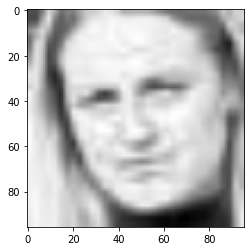

In [4]:
show_random_image(train_csv)
show_random_image(test_csv)

## Plot the image with features given in training data

In [5]:
def show_random_image_with_features(data):
  rand = random.randint(0,data.shape[0])
  img = list(map(lambda x: int(x), data.iloc[rand][-1].split()))
  img = np.array(img)
  img = np.reshape(img, (96,96))
  if(data.shape[1]>2):
    for i in range(0,data.shape[1]-1,2):
      plt.plot(data.iloc[rand][i], data.iloc[rand][i+1],marker="o", color="red")
  plt.imshow(img, cmap = 'gray')

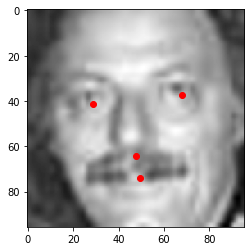

In [6]:
show_random_image_with_features(train_csv)

# Data PreProcessing

In [7]:
train_csv.isna().sum()

left_eye_center_x              10
left_eye_center_y              10
right_eye_center_x             13
right_eye_center_y             13
left_eye_inner_corner_x      4778
left_eye_inner_corner_y      4778
left_eye_outer_corner_x      4782
left_eye_outer_corner_y      4782
right_eye_inner_corner_x     4781
right_eye_inner_corner_y     4781
right_eye_outer_corner_x     4781
right_eye_outer_corner_y     4781
left_eyebrow_inner_end_x     4779
left_eyebrow_inner_end_y     4779
left_eyebrow_outer_end_x     4824
left_eyebrow_outer_end_y     4824
right_eyebrow_inner_end_x    4779
right_eyebrow_inner_end_y    4779
right_eyebrow_outer_end_x    4813
right_eyebrow_outer_end_y    4813
nose_tip_x                      0
nose_tip_y                      0
mouth_left_corner_x          4780
mouth_left_corner_y          4780
mouth_right_corner_x         4779
mouth_right_corner_y         4779
mouth_center_top_lip_x       4774
mouth_center_top_lip_y       4774
mouth_center_bottom_lip_x      33
mouth_center_b

The data has many nan values, we can try mean imputation to fill missing values since many features are located in the same co-ordinates.

Before mean imputation, the image data has to be seperated.

In [8]:
X_csv = train_csv.iloc[:,-1]
Y_csv = train_csv.drop("Image",axis=1)

In [9]:
# Mean Imputation using SimpleImputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy="mean")
Y = imputer.fit_transform(Y_csv)

In [48]:
def resize_image(X):
  images = []
  for i in X:
    img = np.array(i.split())
    img = np.array(X_csv[0].split(), dtype=float)
    img = img.reshape((96,96,1))
    images.append(img)
  return np.array(images)

In [49]:
X = resize_image(X_csv)

# Split the training set to train and test data

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

In [51]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255)

val_datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    rescale=1./255)
train_datagen.fit(X_train)
val_datagen.fit(X_test)


# Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten,  MaxPool2D, Dense, Activation
from keras import backend
backend.set_image_data_format('channels_last')
model = Sequential([
    Conv2D(20, 3, padding="same", input_shape=(96,96,1), activation="relu"),
    Conv2D(20,3,padding="same",activation="relu"),
    MaxPool2D(),
    Conv2D(20,3, padding="same",activation="relu"),
    Conv2D(20,3, padding="same",activation="relu"),
    MaxPool2D(),
    Conv2D(20,3,padding="same", activation="relu"),
    Conv2D(20,3,padding="same", activation="relu"),
    MaxPool2D(),
    Conv2D(20,3,padding="same", activation="relu"),
    Conv2D(20,3,padding="same", activation="relu"),
    MaxPool2D(),
    Conv2D(20,3,padding="same", activation="relu"),
    Conv2D(20,3,padding="same", activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(30, activation="linear")
])

model.compile(loss="mse", optimizer= tf.keras.optimizers.Adam(), metrics=["accuracy","mae","mse"])


In [57]:
history = model.fit(train_datagen.flow(X_train,y_train), epochs=20, validation_data=(X_test,y_test))

Epoch 1/20
177/177 [==============================] - 8s 39ms/step - loss: 260.0362 - accuracy: 0.4595 - mae: 7.9213 - mse: 260.0362 - val_loss: 29486078.0000 - val_accuracy: 0.3908 - val_mae: 5064.3774 - val_mse: 29486078.0000
Epoch 2/20
177/177 [==============================] - 6s 35ms/step - loss: 11.1015 - accuracy: 0.5162 - mae: 2.2026 - mse: 11.1015 - val_loss: 31591808.0000 - val_accuracy: 0.3908 - val_mae: 5242.1216 - val_mse: 31591808.0000
Epoch 3/20
177/177 [==============================] - 6s 35ms/step - loss: 9.7943 - accuracy: 0.5123 - mae: 1.9877 - mse: 9.7943 - val_loss: 34557160.0000 - val_accuracy: 0.3908 - val_mae: 5480.3579 - val_mse: 34557160.0000
Epoch 4/20
177/177 [==============================] - 6s 36ms/step - loss: 9.2408 - accuracy: 0.5086 - mae: 1.8764 - mse: 9.2408 - val_loss: 36603536.0000 - val_accuracy: 0.3908 - val_mae: 5642.7305 - val_mse: 36603536.0000
Epoch 5/20
177/177 [==============================] - 6s 36ms/step - loss: 9.0160 - accuracy: 0.52

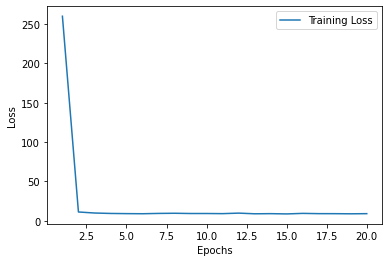

In [58]:
loss_values = history.history['loss']
epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

#Prediction

In [59]:
test = resize_image(test_csv["Image"])

In [62]:
test = test/255

In [65]:
test.shape

(1783, 96, 96, 1)

In [63]:
pred = model.predict(test)

In [66]:
pred.shape

(1783, 30)

In [64]:
lookid_data = pd.read_csv('/content/drive/MyDrive/Facial Detection Key Points/IdLookupTable.csv')
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)
rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('/content/drive/MyDrive/Facial Detection Key Points/face_key_detection_submission.csv',index = False)